In [1]:
import torch
import os

In [2]:
import numpy as np
import matplotlib
import pandas

In [3]:
from fastai import *

In [20]:
from fastai.vision import *
from fastdownload import *
from fastai.vision.all import *

In [66]:
import json
from pathlib import Path
from PIL import Image, ImageDraw

path = Path("/home/mirzaazwad/Documents/Education/Research/DP-II-Paper-Implementations/unet/data/train")
with open(path / 'annotations_train.json', 'r') as f:
    annotations = json.load(f)

images_path = path / 'images'
maks_path = path / 'labels'
maks_path.mkdir(parents=True, exist_ok=True)
print(images_path,maks_path)

for filename, file_annotations in annotations.items():
    filename = file_annotations['filename']

    image = Image.open(images_path / filename)
    img_size = image.size

    mask = Image.new('L', img_size, 0)
    draw = ImageDraw.Draw(mask)

    try:
        for region in file_annotations['regions']:
            if region['shape_attributes']['name'] == 'polygon':
                points = list(zip(region['shape_attributes']['all_points_x'],
                                  region['shape_attributes']['all_points_y']))
                draw.polygon(points, outline=1, fill=1)
            elif region['shape_attributes']['name'] == 'ellipse':
                cx = region['shape_attributes']['cx']
                cy = region['shape_attributes']['cy']
                rx = region['shape_attributes']['rx']
                ry = region['shape_attributes']['ry']

                left = cx - rx
                right = cx + rx
                top = cy - ry
                bottom = cy + ry

                draw.ellipse([left, top, right, bottom], outline=1, fill=1)

        mask.save(maks_path / f"{filename}")
    except Exception as e:
        print(f"Error processing {filename}: {e}")


/home/mirzaazwad/Documents/Education/Research/DP-II-Paper-Implementations/unet/data/train/images /home/mirzaazwad/Documents/Education/Research/DP-II-Paper-Implementations/unet/data/train/labels


In [48]:
import torch.cuda as cuda_ops
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
print("CUDA device count :",torch.cuda.device_count())
if cuda_ops.is_available():
    print("CUDA is available")
else:
    print("CUDA is NOT available")

cuda_ops.empty_cache()

CUDA device count : 1
CUDA is available


In [67]:
dls=SegmentationDataLoaders.from_label_func(
    path,bs=8,fnames=get_image_files(images_path),
    label_func=lambda o: path/'labels'/f'{o.stem}{o.suffix}',
    codes=np.loadtxt(path/'codes.txt', dtype=str),
    item_tfms=Resize(128),
    batch_tfms=aug_transforms(size=128)
)

In [50]:
xb, yb = dls.one_batch()
unique_classes = yb.unique()
print(f"Unique classes in the dataset: {unique_classes}")

Unique classes in the dataset: TensorMask([0, 1, 2], device='cuda:0')


In [24]:
learn = unet_learner(dls,resnet34,self_attention=True)

learn.fine_tune(150)

epoch,train_loss,valid_loss,time
0,0.228855,0.116183,00:08


epoch,train_loss,valid_loss,time
0,0.101941,0.065417,00:09
1,0.077148,0.054823,00:09
2,0.060653,0.047571,00:09
3,0.052396,0.046034,00:09
4,0.046715,0.045109,00:09
5,0.043486,0.039843,00:09
6,0.041837,0.041994,00:09
7,0.039753,0.045622,00:09
8,0.037873,0.041610,00:09
9,0.037950,0.041994,00:09


In [32]:
res=learn.predict("/home/mirzaazwad/Documents/Education/Research/DP-II-Paper-Implementations/unet/data/validate/images/y500.jpg")

In [33]:
print(res)

(TensorMask([[0, 0, 0,  ..., 0, 0, 0],
            [0, 0, 0,  ..., 0, 0, 0],
            [0, 0, 0,  ..., 0, 0, 0],
            ...,
            [0, 0, 0,  ..., 0, 0, 0],
            [0, 0, 0,  ..., 0, 0, 0],
            [0, 0, 0,  ..., 0, 0, 0]]), TensorBase([[0, 0, 0,  ..., 0, 0, 0],
            [0, 0, 0,  ..., 0, 0, 0],
            [0, 0, 0,  ..., 0, 0, 0],
            ...,
            [0, 0, 0,  ..., 0, 0, 0],
            [0, 0, 0,  ..., 0, 0, 0],
            [0, 0, 0,  ..., 0, 0, 0]]), TensorBase([[[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
              1.0000e+00, 1.0000e+00],
             [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
              1.0000e+00, 1.0000e+00],
             [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
              1.0000e+00, 1.0000e+00],
             ...,
             [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00,
              1.0000e+00, 1.0000e+00],
             [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0

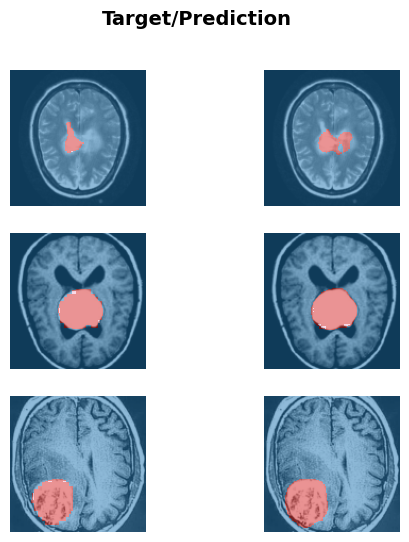

In [70]:
learn.show_results(dl=dls.valid,max_n=3, figsize=(6,6))

In [71]:
import json
from pathlib import Path
from PIL import Image, ImageDraw

path = Path("/home/mirzaazwad/Documents/Education/Research/DP-II-Paper-Implementations/unet/data/validate")
with open(path / 'annotations_val.json', 'r') as f:
    annotations = json.load(f)

images_path = path / 'images'
maks_path = path / 'labels'
maks_path.mkdir(parents=True, exist_ok=True)
print(images_path,maks_path)

for filename, file_annotations in annotations.items():
    filename = file_annotations['filename']

    image = Image.open(images_path / filename)
    img_size = image.size

    mask = Image.new('L', img_size, 0)
    draw = ImageDraw.Draw(mask)

    try:
        for region in file_annotations['regions']:
            if region['shape_attributes']['name'] == 'polygon':
                points = list(zip(region['shape_attributes']['all_points_x'],
                                  region['shape_attributes']['all_points_y']))
                draw.polygon(points, outline=1, fill=1)
            elif region['shape_attributes']['name'] == 'ellipse':
                cx = region['shape_attributes']['cx']
                cy = region['shape_attributes']['cy']
                rx = region['shape_attributes']['rx']
                ry = region['shape_attributes']['ry']

                left = cx - rx
                right = cx + rx
                top = cy - ry
                bottom = cy + ry

                draw.ellipse([left, top, right, bottom], outline=1, fill=1)

        mask.save(maks_path / f"{filename}")
    except Exception as e:
        print(f"Error processing {filename}: {e}")


/home/mirzaazwad/Documents/Education/Research/DP-II-Paper-Implementations/unet/data/validate/images /home/mirzaazwad/Documents/Education/Research/DP-II-Paper-Implementations/unet/data/validate/labels


In [72]:
val_dls=SegmentationDataLoaders.from_label_func(
    path,bs=8,fnames=get_image_files(path),
    label_func=lambda o: path/'labels'/f'{o.stem}{o.suffix}',
    codes=np.loadtxt(path/'codes.txt', dtype=str),
    item_tfms=Resize(128),
    batch_tfms=aug_transforms(size=128)
)

In [73]:
learn.dls.valid=val_dls.valid

In [74]:
validation_results = learn.validate()

In [75]:
print(validation_results)

[0.4154451787471771]


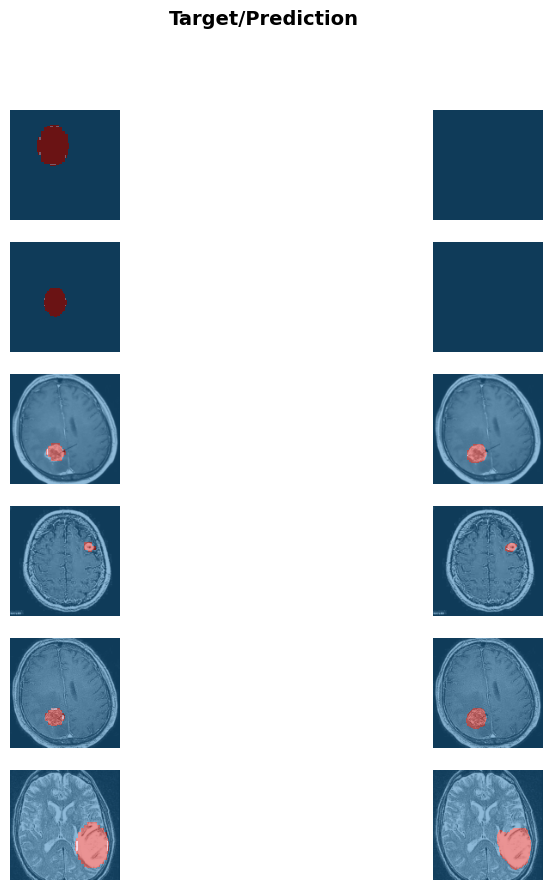

In [76]:
learn.show_results(dl=val_dls.valid, max_n=6, figsize=(10, 10))

In [77]:
learn.save('second_run')

Path('/home/mirzaazwad/Documents/Education/Research/DP-II-Paper-Implementations/unet/data/train/models/second_run.pth')

In [78]:
learn.export('second_run_exp')

PicklingError: Can't pickle <function <lambda> at 0x7337a0936d40>: attribute lookup <lambda> on __main__ failed